<a href="https://colab.research.google.com/github/mohit0412/data/blob/main/Depression_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Depression Data Set Analysis

In [ ]:
# !pip install category_encoders

In [ ]:
import pandas as pd
import numpy as np
import category_encoders as ce
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import RocCurveDisplay

In [ ]:
df=pd.read_csv('data.csv',sep='\t')

In [ ]:
print("Shape of our data", df.shape)

Shape of our data (39775, 172)


In [ ]:
df.describe()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,age,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize
count,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,39775.000000,3.977500e+04,39775.000000,...,39775.000000,39775.000000,39775.000000,39775.00000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000,39775.000000
mean,2.619485,21.555977,6.970591e+03,2.172269,21.248070,5.332376e+03,2.226097,21.583004,7.426446e+03,1.950170,...,23.612168,1.274519,1.200025,1.13516,7.555852,1.642992,31.312885,1.705795,1.159547,3.510270
std,1.032117,12.133621,8.670513e+04,1.111563,12.125288,2.651361e+04,1.038526,12.115637,1.587024e+05,1.042218,...,21.581722,0.446277,0.400024,0.40030,3.554395,1.351362,25.871272,0.473388,0.445882,2.141518
min,1.000000,1.000000,1.800000e+02,1.000000,1.000000,1.760000e+02,1.000000,1.000000,-1.081400e+04,1.000000,...,13.000000,1.000000,1.000000,0.00000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000
25%,2.000000,11.000000,2.664000e+03,1.000000,11.000000,2.477000e+03,1.000000,11.000000,2.857000e+03,1.000000,...,18.000000,1.000000,1.000000,1.00000,4.000000,1.000000,10.000000,1.000000,1.000000,2.000000
50%,3.000000,22.000000,3.609000e+03,2.000000,21.000000,3.511000e+03,2.000000,22.000000,3.898000e+03,2.000000,...,21.000000,1.000000,1.000000,1.00000,10.000000,1.000000,10.000000,2.000000,1.000000,3.000000
75%,4.000000,32.000000,5.358000e+03,3.000000,32.000000,5.216000e+03,3.000000,32.000000,5.766000e+03,3.000000,...,25.000000,2.000000,1.000000,1.00000,10.000000,2.000000,60.000000,2.000000,1.000000,4.000000
max,4.000000,42.000000,1.210228e+07,4.000000,42.000000,2.161057e+06,4.000000,42.000000,2.858269e+07,4.000000,...,1998.000000,2.000000,2.000000,3.00000,12.000000,5.000000,70.000000,2.000000,3.000000,133.000000


Removing these value as these are extra information collected with survey

In [ ]:
removedFeatures = [f'Q{i}E' for i in range(1, 43)]
removedFeatures.extend([f'Q{i}I' for i in range(1, 43)])
removedFeatures.extend([f'VCL{i}' for i in range(1, 17)])
removedFeatures.extend([ 'source', 'introelapse', 'testelapse', 'surveyelapse', 'engnat', 'hand', 'orientation',
    'voted', 'country', 'screensize', 'uniquenetworklocation'])

# remove features from the dataset
depression = df.drop(removedFeatures, axis=1)

In [ ]:
depression.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,TIPI10,education,urban,gender,age,religion,race,married,familysize,major
0,4,4,2,4,4,4,4,4,2,1,...,1,2,3,2,16,12,10,1,2,NaN
1,4,1,2,3,4,4,3,4,3,2,...,5,2,3,2,16,7,70,1,4,NaN
2,3,1,4,1,4,3,1,3,2,4,...,2,2,3,2,17,4,60,1,3,NaN
3,2,3,2,1,3,3,4,2,3,3,...,1,1,3,2,13,4,70,1,5,biology
4,2,2,3,4,4,2,4,4,4,3,...,3,3,2,2,19,10,10,1,4,Psychology


## Analysing missing value in dataframe

In [ ]:
# get the number of missing data points per column
missing_value_count = (depression.isnull().sum())
print(missing_value_count[missing_value_count > 0])
# percent of data that is missing
total_cells = np.product(depression.shape)
total_missing_value = missing_value_count.sum()
print('Percentage of missing value in Data Frame is: ',total_missing_value / total_cells *100 )
print('Total number of our cells is :',total_cells)
print('Total number of our missing value is :',total_missing_value)

major    11403
dtype: int64
Percentage of missing value in Data Frame is:  0.4699797013941124
Total number of our cells is : 2426275
Total number of our missing value is : 11403


In [ ]:
depression.drop('major', inplace=True, axis=1)

In [ ]:
print("New shape of our data", depression.shape)

New shape of our data (39775, 60)


Description, 1=Agnostic, 2=Atheist, 3=Buddhist, 4=Christian (Catholic), 5=Christian (Mormon), 6=Christian (Protestant), 7=Christian (Other), 8=Hindu, 9=Jewish, 10=Muslim, 11=Sikh, 12=Other

In [ ]:
depression['religion'].value_counts()

10    22073
2      3845
1      3245
4      3097
7      2254
12     1804
6      1544
8       700
3       527
0       356
9       144
5       122
11       64
Name: religion, dtype: int64

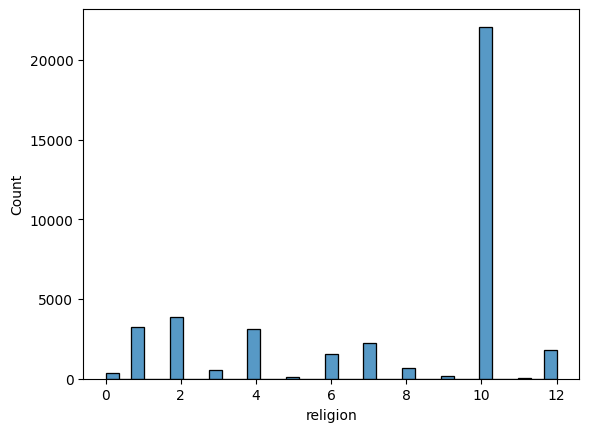

In [ ]:
sns.histplot(data=depression, x="religion")
plt.show()

encoding the religion variable to become same

In [ ]:
depression['age'].value_counts()

20      3789
21      3535
19      3510
18      3046
22      3009
        ... 
89         1
1996       1
223        1
78         1
99         1
Name: age, Length: 79, dtype: int64

In [ ]:
str(list(set(depression['age'].to_list())))

'[13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 82, 85, 89, 99, 115, 117, 223, 1991, 1993, 1996, 1998]'

since there are wrong value in age

In [ ]:
# print missing ages
missing_ages = depression[depression['age'] >100]
missing_ages['age']

5340      223
10231    1996
14236     117
21383    1998
24898     115
30027    1993
33730    1991
Name: age, dtype: int64

In [ ]:
# delete missing ages
depression.drop(missing_ages['age'].index,axis=0,inplace=True)
df.drop(missing_ages['age'].index,axis=0,inplace=True)
depression.shape

(39768, 60)

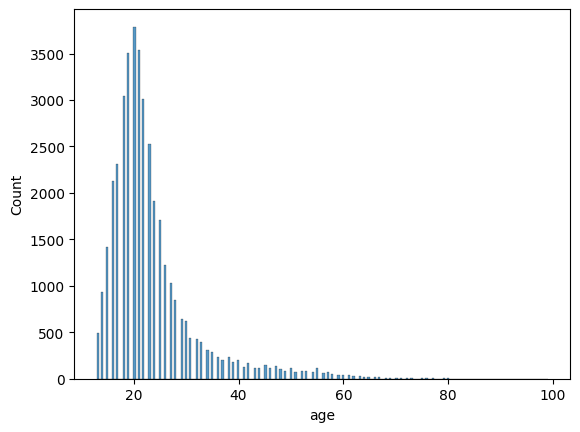

In [ ]:
sns.histplot(data=depression, x="age")
plt.show()

<Axes: >

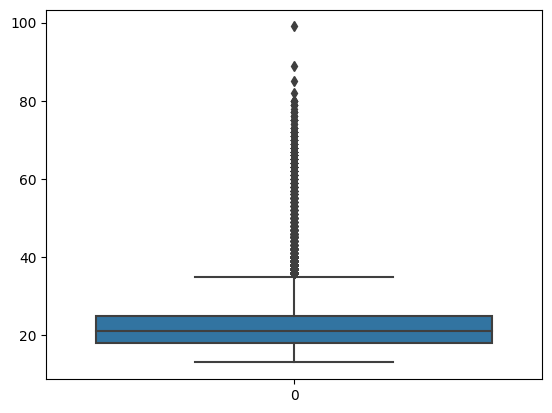

In [ ]:
sns.boxplot(depression["age"],  fliersize=5)

In [ ]:
depression["age"].describe()

count    39768.000000
mean        23.404270
std          8.582769
min         13.000000
25%         18.000000
50%         21.000000
75%         25.000000
max         99.000000
Name: age, dtype: float64

In [ ]:
print('minimum age :-', depression["age"].describe()['min'])
print('maximum age :-', depression["age"].describe()['max'])
print('mean age :-', depression["age"].describe()['mean'])

minimum age :- 13.0
maximum age :- 99.0
mean age :- 23.404269764634883


In [ ]:
depression['familysize'].value_counts()

3      9204
2      9016
4      7538
5      4829
1      2946
6      2449
7      1243
0      1125
8       676
9       331
10      195
11      109
12       56
13       19
14        8
15        6
16        5
17        3
24        1
23        1
21        1
19        1
62        1
26        1
65        1
54        1
99        1
133       1
Name: familysize, dtype: int64

As there are wrong values in age

**Assuming not more than 10 people in family**

In [ ]:
# print missing ages
missing_val_family_size = depression[depression['familysize'] > 10]
missing_val_family_size['familysize']

98       12
182      11
446      13
1161     12
1174     62
         ..
38646    12
39015    11
39091    12
39332    12
39550    11
Name: familysize, Length: 216, dtype: int64

In [ ]:
print('Total no wrong value',sum(missing_val_family_size['familysize'].to_list()))

Total no wrong value 2977


In [ ]:
# delete wrong values
depression.drop(missing_val_family_size['familysize'].index,axis=0,inplace=True)
df.drop(missing_val_family_size['familysize'].index,axis=0,inplace=True)
depression.shape

(39552, 60)

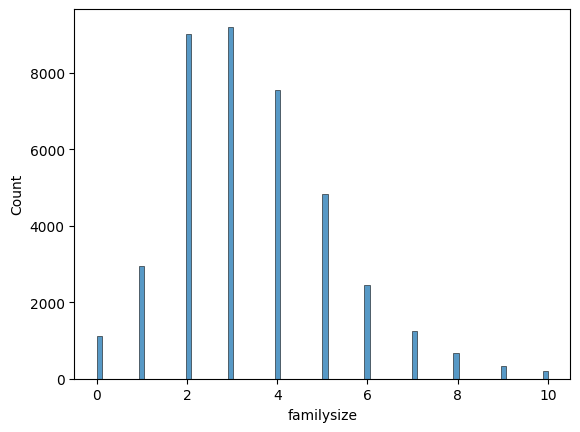

In [ ]:
sns.histplot(data=depression, x="familysize")
plt.show()

<Axes: >

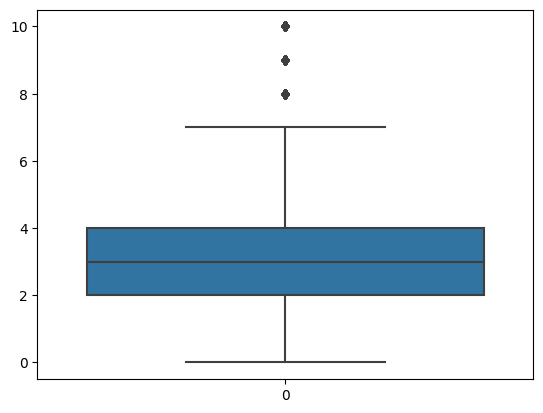

In [ ]:
sns.boxplot(depression["familysize"],  fliersize=5)

In [ ]:
depression.columns

Index(['Q1A', 'Q2A', 'Q3A', 'Q4A', 'Q5A', 'Q6A', 'Q7A', 'Q8A', 'Q9A', 'Q10A',
       'Q11A', 'Q12A', 'Q13A', 'Q14A', 'Q15A', 'Q16A', 'Q17A', 'Q18A', 'Q19A',
       'Q20A', 'Q21A', 'Q22A', 'Q23A', 'Q24A', 'Q25A', 'Q26A', 'Q27A', 'Q28A',
       'Q29A', 'Q30A', 'Q31A', 'Q32A', 'Q33A', 'Q34A', 'Q35A', 'Q36A', 'Q37A',
       'Q38A', 'Q39A', 'Q40A', 'Q41A', 'Q42A', 'TIPI1', 'TIPI2', 'TIPI3',
       'TIPI4', 'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10',
       'education', 'urban', 'gender', 'age', 'religion', 'race', 'married',
       'familysize'],
      dtype='object')

 Description, 1=Rural (country side), 2=Suburban, 3=Urban

In [ ]:
depression['urban'].value_counts()

3    17779
2    13174
1     8218
0      381
Name: urban, dtype: int64

Description, 1=Male, 2=Female, 3=Other

In [ ]:
depression['gender'].value_counts()

2    30191
1     8746
3      548
0       67
Name: gender, dtype: int64

Description, 10=Asian, 20=Arab, 30=Black, 40=Indigenous Australian, 50=Native American, 60=White, 70=Other

In [ ]:
depression['race'].value_counts()

10    22933
60    10643
70     4805
30      601
20      330
50      219
40       21
Name: race, dtype: int64

Description, 1=Never married, 2=Currently married, 3=Previously married

In [ ]:
depression['married'].value_counts()

1    33959
2     4316
3     1083
0      194
Name: married, dtype: int64

Description, 1=Less than high school, 2=High school, 3=University degree, 4=Graduate degree

In [ ]:
depression['education'].value_counts()

3    15013
2    15006
4     4969
1     4050
0      514
Name: education, dtype: int64

In [ ]:
depression.columns

Index(['Q1A', 'Q2A', 'Q3A', 'Q4A', 'Q5A', 'Q6A', 'Q7A', 'Q8A', 'Q9A', 'Q10A',
       'Q11A', 'Q12A', 'Q13A', 'Q14A', 'Q15A', 'Q16A', 'Q17A', 'Q18A', 'Q19A',
       'Q20A', 'Q21A', 'Q22A', 'Q23A', 'Q24A', 'Q25A', 'Q26A', 'Q27A', 'Q28A',
       'Q29A', 'Q30A', 'Q31A', 'Q32A', 'Q33A', 'Q34A', 'Q35A', 'Q36A', 'Q37A',
       'Q38A', 'Q39A', 'Q40A', 'Q41A', 'Q42A', 'TIPI1', 'TIPI2', 'TIPI3',
       'TIPI4', 'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10',
       'education', 'urban', 'gender', 'age', 'religion', 'race', 'married',
       'familysize'],
      dtype='object')

In [ ]:
corr_data = depression[['education','urban', 'gender', 'age','religion','race','married','familysize']]

In [ ]:
# Correlation matrix
def plotCorrelationMatrix(df, FIGSIZE):
    corr = df.corr()
    plt.figure(num=None, figsize=(FIGSIZE, FIGSIZE), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix', fontsize=15)
    plt.show()

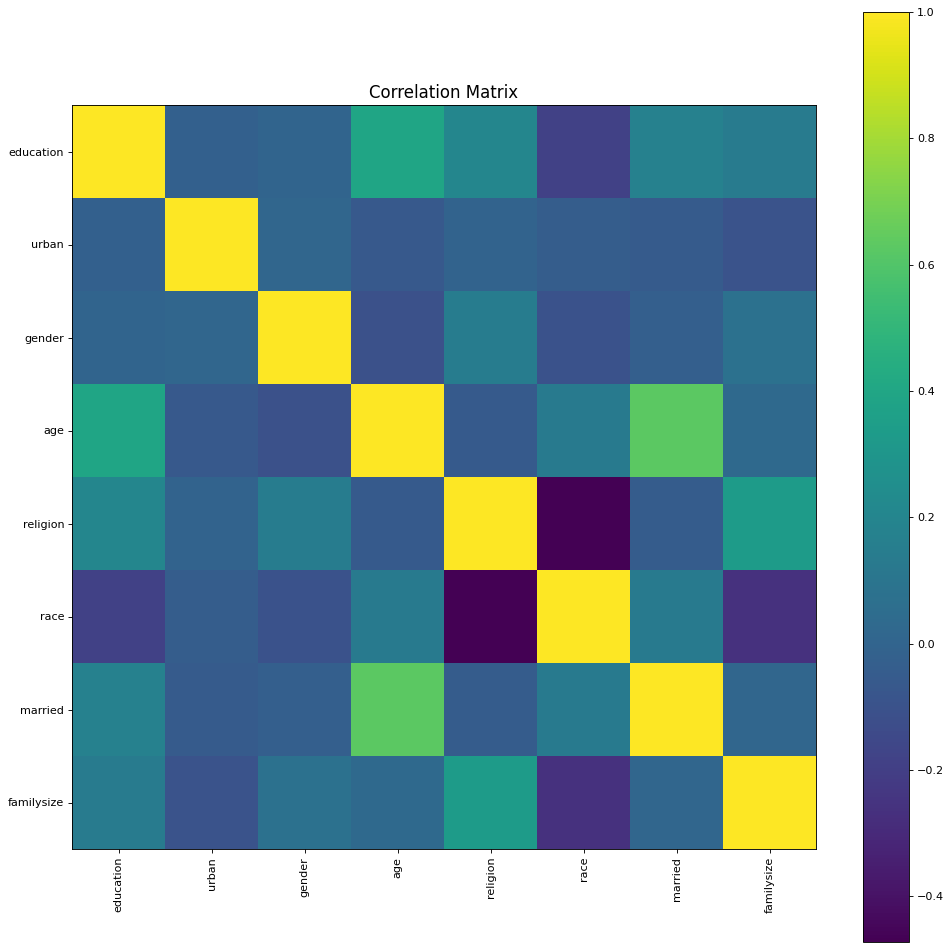

In [ ]:
plotCorrelationMatrix(corr_data, 15)

In [ ]:
# Scatter and density plots
def plotScatterMatrix(df, FIGSIZE, FONTSIZE):
    columnNames = list(df)
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[FIGSIZE, FIGSIZE], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.4), xycoords='axes fraction', ha='center', va='center', size=FONTSIZE)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [ ]:
# plotScatterMatrix(corr_data, 30, 10)

In [ ]:
depression['total_count']  = depression.sum(axis=1)

In [ ]:
depression['total_count'].describe()

count    39552.000000
mean       218.330451
std         39.464418
min         90.000000
25%        189.000000
50%        218.000000
75%        246.000000
max        352.000000
Name: total_count, dtype: float64

plotting distribution of target variable

<ipython-input-44-e094b42c7059>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=depression['total_count'])


<Axes: ylabel='Density'>

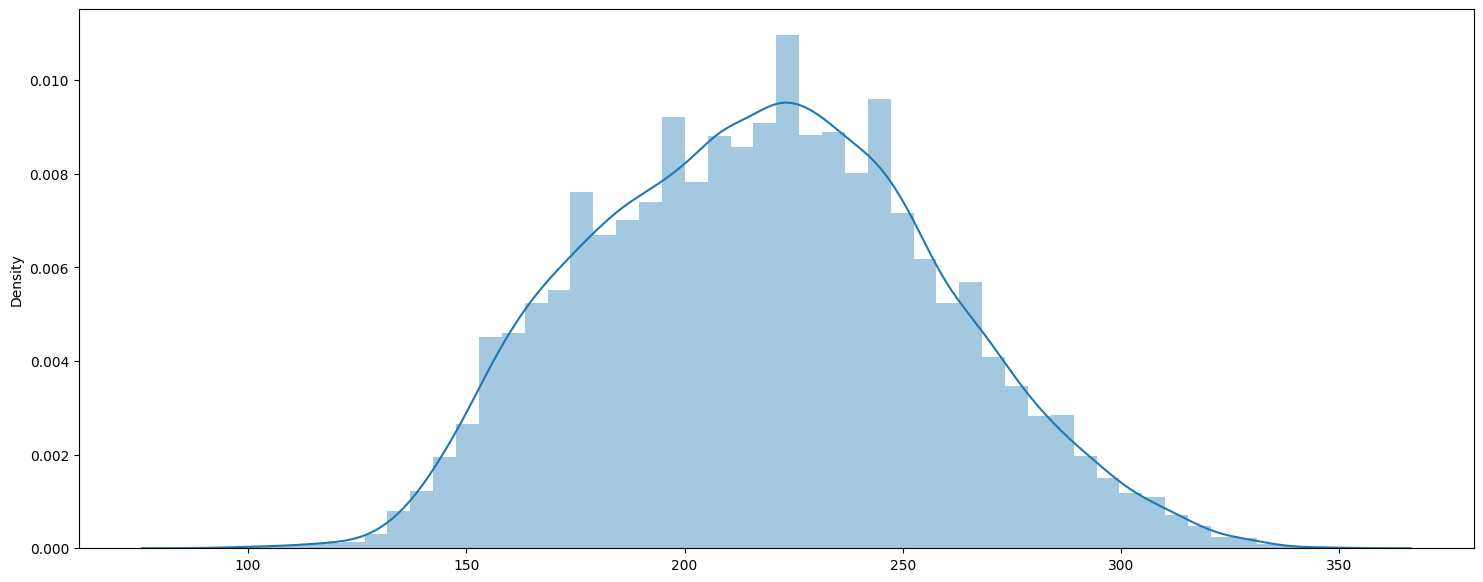

In [ ]:
plt.figure(figsize=(18, 7))
sns.distplot(x=depression['total_count'])

In [ ]:
def buildTarget(value):
    if value <= 133:
        return 'Normal'
    if 133 < value <= 147:
        return 'Mild'
    if 147 < value <= 170:
        return 'Moderate'
    if 170 < value <= 194:
        return 'Severe'
    if value > 194:
        return 'Extremely Severe'

In [ ]:
# build target feature
depression['target'] = depression['total_count'].apply(buildTarget)

<Axes: xlabel='target', ylabel='count'>

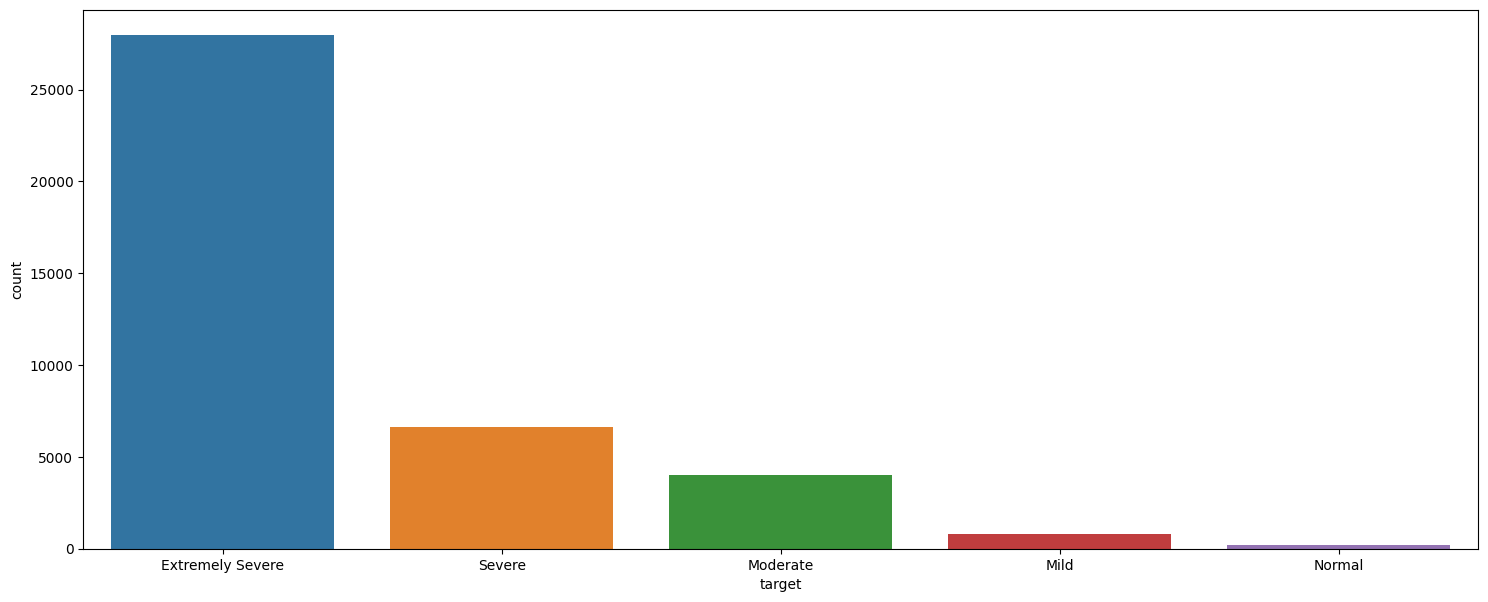

In [ ]:
# Let's visualize to see
plt.figure(figsize=(18, 7))
sns.countplot(x=depression['target'])

In [ ]:
# split target from depression dataset
target = depression['target']
depression.drop(['target', 'total_count'], axis=1, inplace=True)

In [ ]:
# split in train and test data
x_train, x_test, y_train, y_test = train_test_split(depression, target, test_size=.3)

In [ ]:
print(f'x_train: {x_train.shape}, y_train: {y_train.shape}')
print(f'x_test: {x_test.shape}, y_test: {y_test.shape}')

x_train: (27686, 60), y_train: (27686,)
x_test: (11866, 60), y_test: (11866,)


In [ ]:
# scalling the data
scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
# from imblearn.combine import SMOTEENN
# # from imblearn.pipeline import Pipeline
# from imblearn.under_sampling import EditedNearestNeighbours
# #Define SMOTE-ENN
# resample=SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='all'))
# # pipeline=Pipeline(steps=[('r', resample), ('m', knnClassifier)])

In [ ]:
# from imblearn.over_sampling import SMOTE
# over = SMOTE(sampling_strategy=0.1)
# resample.fit_resample(x_train, y_train)

**weights='distance'** give more weightage to nearest point     
**n_neighbors = 5 **atlest 5 sample per classes                                      
**metric = 'minkowski', p=2**, l2 loss

In [ ]:
knnClassifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2, weights='distance')

In [ ]:
cv=RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)
#Evaluate model
scoring=['accuracy','precision_macro','recall_macro']
scores = cross_validate(knnClassifier, x_train_scaled, y_train, scoring=scoring, cv=cv, n_jobs=3)

In [ ]:
# summarize performance
print('Mean Accuracy: %.4f' % np.mean(scores['test_accuracy']))
print('Mean Precision: %.4f' % np.mean(scores['test_precision_macro']))
print('Mean Recall: %.4f' % np.mean(scores['test_recall_macro']))

Mean Accuracy: 0.8789
Mean Precision: 0.7046
Mean Recall: 0.7120


In [ ]:
knnClassifier.fit(x_train_scaled, y_train)

KNeighborsClassifier(weights='distance')

In [ ]:
y_pred = knnClassifier.predict(x_test_scaled)

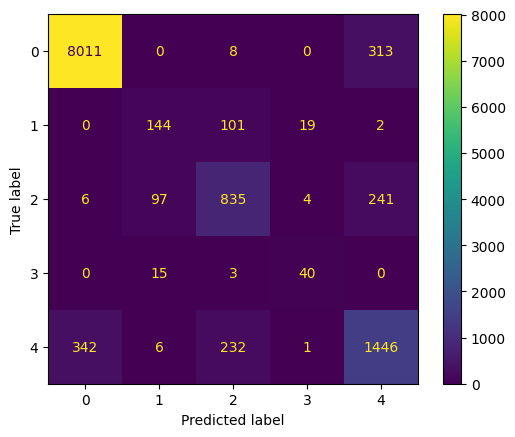

In [ ]:
# confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
print('accuracy_score',accuracy_score(y_test, y_pred))
print('precision_score',precision_score(y_test, y_pred, average='weighted'))
print('recall_score',recall_score(y_test, y_pred, average='weighted'))
print('f1_score',f1_score(y_test, y_pred, average='weighted'))

accuracy_score 0.8828585875610989
precision_score 0.8823076338687148
recall_score 0.8828585875610989
f1_score 0.8825679505810211


In [ ]:
pred_prob1 = knnClassifier.predict_proba(x_test_scaled)

In [ ]:
pred_prob1.shape

(11866, 5)

In [ ]:
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

(11866, 5)

## ROC and AUC for all

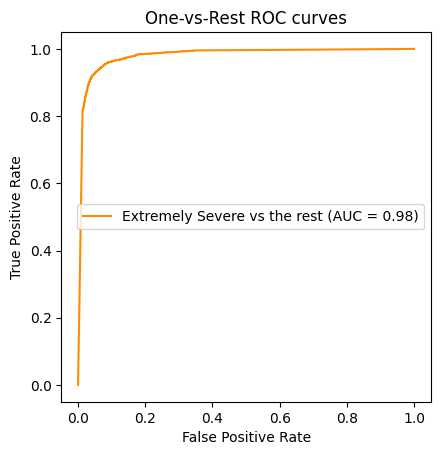

In [ ]:
class_id = 0
class_name = 'Extremely Severe'

RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    pred_prob1[:, class_id],
    name=f"{class_name} vs the rest",
    color="darkorange",
    # plot_chance_level=True,
)
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves")
plt.legend()
plt.show()

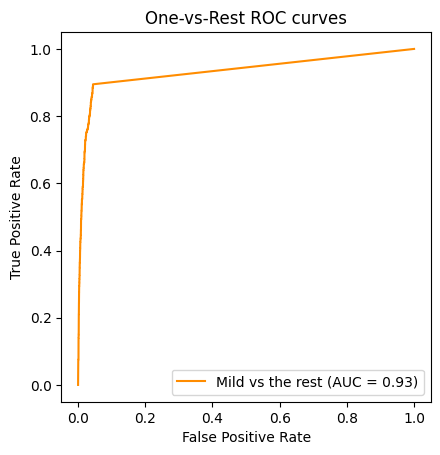

In [ ]:
class_id = 1
class_name = 'Mild' #'Moderate', 'Normal', 'Severe'
RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    pred_prob1[:, class_id],
    name=f"{class_name} vs the rest",
    color="darkorange",
    # plot_chance_level=True,
)
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves")
plt.legend()
plt.show()

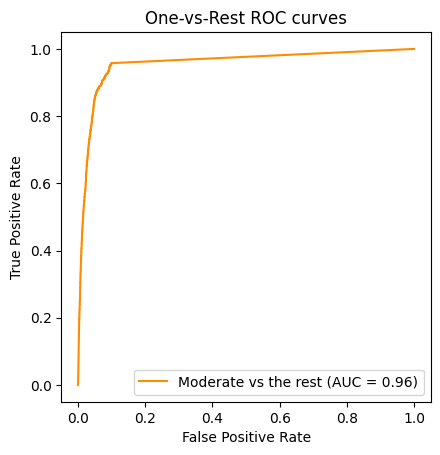

In [ ]:
class_id = 2
class_name = 'Moderate'
RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    pred_prob1[:, class_id],
    name=f"{class_name} vs the rest",
    color="darkorange",
    # plot_chance_level=True,
)
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves")
plt.legend()
plt.show()

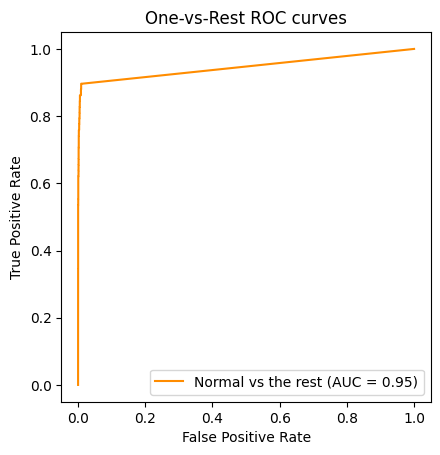

In [ ]:
class_id = 3
class_name = 'Normal'
RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    pred_prob1[:, class_id],
    name=f"{class_name} vs the rest",
    color="darkorange",
    # plot_chance_level=True,
)
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves")
plt.legend()
plt.show()

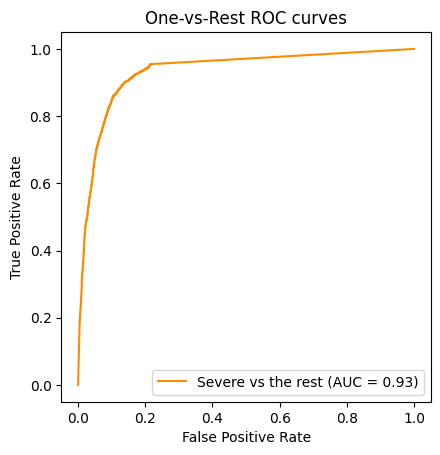

In [ ]:
class_id = 4
class_name = 'Severe'
RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    pred_prob1[:, class_id],
    name=f"{class_name} vs the rest",
    color="darkorange",
    # plot_chance_level=True,
)
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves")
plt.legend()
plt.show()